## Задание 1

[-3.49390615 -3.25064495 -2.46820516 -1.11265688 -0.83937114  0.22280808
  1.62728901  2.92214     3.20900237  4.2961499 ]
[16.66736298  9.34524441  5.60723398  2.42942868  0.66187502  0.58621619
  2.39578621  5.64790745  9.8877989  15.87723187]


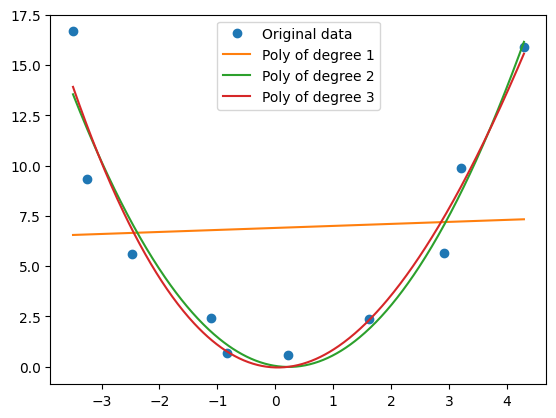

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
from numpy import *
#генерируем случайные х и у
delta = 1.2
x = linspace(-4,4,10)
y = x**2+delta*(rand(10)-0.4)
x += delta*(rand(10)-0.4)

#записывает данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)

# Экстраполяция полиномами различных степеней
poly_1 = np.polyfit(x, y, 1)
poly_2 = np.polyfit(x, y, 2)
poly_3 = np.polyfit(x, y, 3)

# Создание функций на основе полученных полиномов
f_1 = np.poly1d(poly_1)
f_2 = np.poly1d(poly_2)
f_3 = np.poly1d(poly_3)

# Генерация данных для графика
x_new = np.linspace(x[0], x[-1], 500)
y_new_1 = f_1(x_new)
y_new_2 = f_2(x_new)
y_new_3 = f_3(x_new)

# Построение графика
plt.plot(x, y, 'o', label='Original data')
plt.plot(x_new, y_new_1, '-', label='Poly of degree 1')
plt.plot(x_new, y_new_2, '-', label='Poly of degree 2')
plt.plot(x_new, y_new_3, '-', label='Poly of degree 3')
plt.legend()
plt.show()

## Задание 2

[0.51329026 0.70376778]
1.1229677232291368e-05
0.009874371394705681


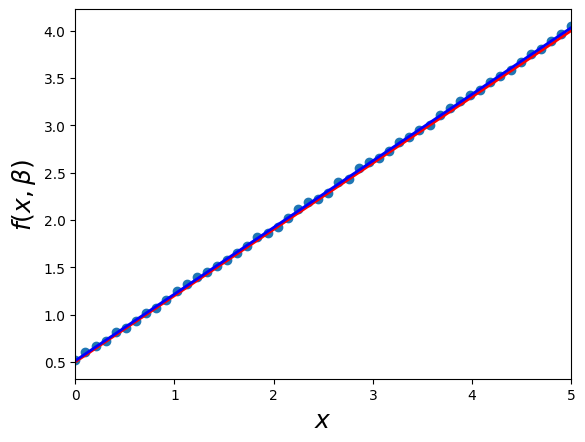

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Добавляем шум к данным, созданным по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.5, 0.7)
def f(x, b0, b1):
    return b0 + b1 * x

# Задаем массив точек xi
xdata = np.linspace(0, 5, 50)

# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Добавляем шум к этим данным
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


[0.82485632 0.79845979 0.30032124]
1.3616572611474746e-05
0.011354795902822757


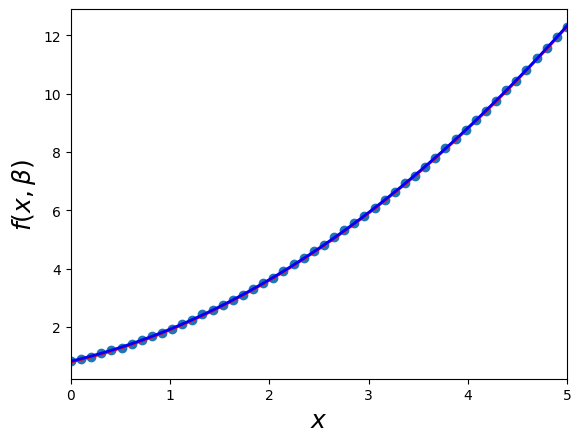

In [5]:
# Добавляем шум к данным, созданным по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.8, 0.8, 0.3)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

# Задаем массив точек xi
xdata = np.linspace(0, 5, 50)

# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Добавляем шум к этим данным
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


[2.0271833  4.98499923]
6.691182489792033e-05
0.15472966720972053


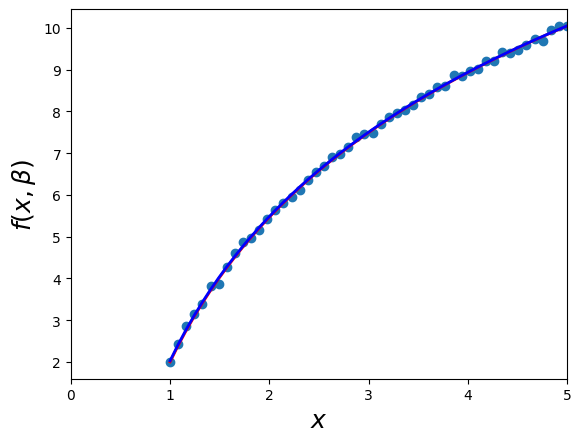

In [87]:
# Добавляем шум к данным, созданным по функции f(x,b) с коэффициентами b = (1, 2)
beta = (2, 5)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

# Задаем массив точек xi
xdata = np.linspace(1, 5, 50)

# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Добавляем шум к этим данным
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


[3.99995784 5.00000874]
1.2597244676945421e-08
0.1512918006904425


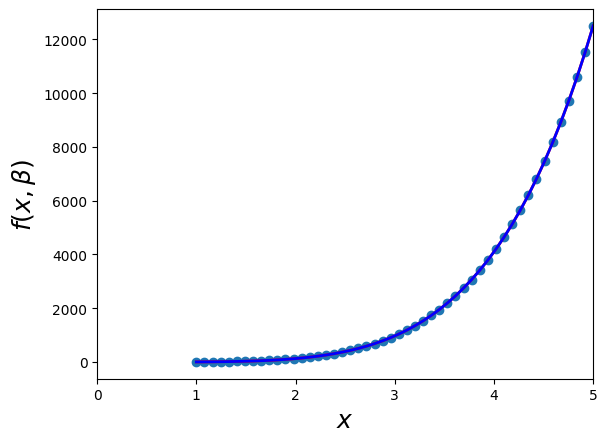

In [80]:
# Добавляем шум к данным, созданным по функции f(x,b) с коэффициентами b = (2, 3)
beta = (4, 5)
def f(x, b0, b1):
    return b0 * x ** b1

# Задаем массив точек xi
xdata = np.linspace(1, 5, 50)

# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# Добавляем шум к этим данным
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычисляем квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


## Задание 3

Коэффициент: [9449.96232146], Свободный член: 25792.20019866871


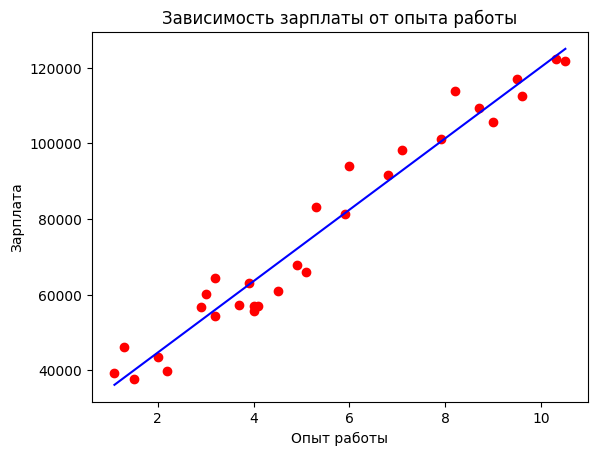

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('Salary_Data.csv')

# Подготовка данных
X = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary']

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов линии регрессии
coef = model.coef_
intercept = model.intercept_

# Построение прогноза
y_pred = model.predict(X)

# Вывод коэффициентов и графика
print(f'Коэффициент: {coef}, Свободный член: {intercept}')
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Зависимость зарплаты от опыта работы')
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.show()

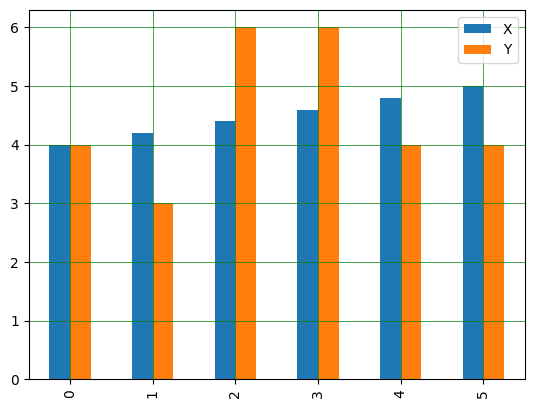

In [22]:
import matplotlib.pyplot as plt

# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

## Задание 4

    Actual   Predicted
33     628  621.250921
23     547  463.618291
38     648  727.431022
36     640  646.094665
2      561  585.209891
3      414  486.869741
31     554  587.673738
26     577  597.031210
44     782  702.923921
27     631  617.312283
Коэффициенты: [-3.20039537e+01 -7.51879019e-02 -2.13729515e-03  1.35582761e+03], Свободный член: 380.8564540023473
Среднеквадратическая ошибка: 2721.6159571932158


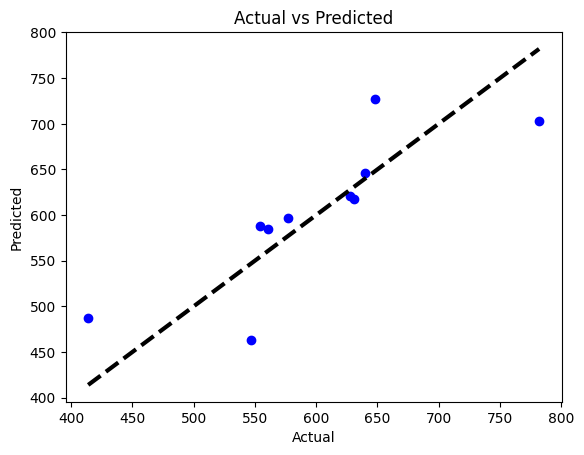

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('petrol_consumption.csv')

# Подготовка данных
X = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Создание и обучение модели
model = LinearRegression()  
model.fit(X_train, y_train)

# Получение коэффициентов линии регрессии
coef = model.coef_
intercept = model.intercept_

# Построение прогноза
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
# Вывод коэффициентов и оценка модели
print(f'Коэффициенты: {coef}, Свободный член: {intercept}')
print('Среднеквадратическая ошибка:', metrics.mean_squared_error(y_test, y_pred))

# Визуализация результатов
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Задание 5.6

              X         Y
count  6.000000  6.000000
mean   4.500000  4.500000
std    0.374166  1.224745
min    4.000000  3.000000
25%    4.250000  4.000000
50%    4.500000  4.000000
75%    4.750000  5.500000
max    5.000000  6.000000
Таблица для полинома первой степени:
     X    Y        Y1
0  4.0  4.0  4.285714
1  4.2  3.0  4.371429
2  4.4  6.0  4.457143
3  4.6  6.0  4.542857
4  4.8  4.0  4.628571
5  5.0  4.0  4.714286
MSE для полинома первой степени: 1.2285714285714284

Таблица для полинома второй степени:
     X    Y        Y2
0  4.0  4.0  3.392857
1  4.2  3.0  4.550000
2  4.4  6.0  5.171429
3  4.6  6.0  5.257143
4  4.8  4.0  4.807143
5  5.0  4.0  3.821429
MSE для полинома второй степени: 0.7821428571428557


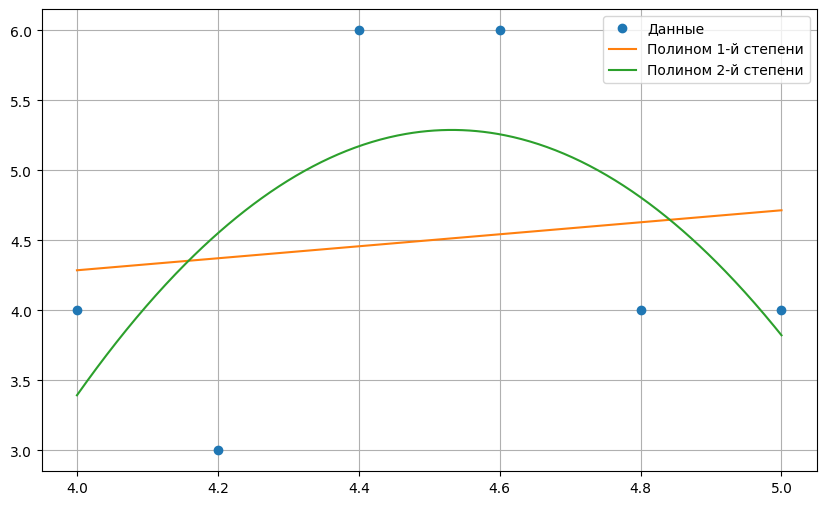

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Ваши данные
X = np.array([4.0, 4.2, 4.4, 4.6, 4.8, 5.0])
Y = np.array([4.0, 3.0, 6.0, 6.0, 4.0, 4.0])

# Создание фрейма данных
df = pd.DataFrame({'X': X, 'Y': Y})

# Вывод описательной статистики
print(df.describe())

# Построение полинома первой степени
coeffs1 = np.polyfit(X, Y, 1)
poly1 = np.poly1d(coeffs1)

# Построение полинома второй степени
coeffs2 = np.polyfit(X, Y, 2)
poly2 = np.poly1d(coeffs2)

# Вычисление MSE для полинома первой степени
mse1 = np.mean((Y - poly1(X))**2)

# Вычисление MSE для полинома второй степени
mse2 = np.mean((Y - poly2(X))**2)

# Генерация значений X для графика
X_line = np.linspace(X.min(), X.max(), 500)

# Создание таблицы для полинома первой степени
Y1 = poly1(X)
data1 = {'X': X, 'Y': Y, 'Y1': Y1}
df1 = pd.DataFrame(data1)

# Создание таблицы для полинома второй степени
Y2 = poly2(X)
data2 = {'X': X, 'Y': Y, 'Y2': Y2}
df2 = pd.DataFrame(data2)

# Вывод таблиц
print("Таблица для полинома первой степени:")
print(df1)
print("MSE для полинома первой степени:", mse1)
print("\nТаблица для полинома второй степени:")
print(df2)
print("MSE для полинома второй степени:", mse2)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'o', label='Данные')
plt.plot(X_line, poly1(X_line), label='Полином 1-й степени')
plt.plot(X_line, poly2(X_line), label='Полином 2-й степени')
plt.legend()
plt.grid()
plt.show()